## Scoping


### Project Goals


### Data


### Analysis


### Evaluation

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

## Loading the Data

### Species

The dataset `species_info.csv`  contains data about different species and their conservation status and has the following columns of data:

- **category** - class of animal
- **scientific_name** - the scientific name of each species
- **common_name** - the common names of each species
- **conservation_status** - each species’ current conservation status


In [4]:
df_species = pd.read_csv("species_info.csv", encoding='utf-8')
df_species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [5]:
df_species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


### Observations

The dataset `observations.csv` holds recorded sightings of different species at several national parks for the past 7 days and has the following columns of data:
- **scientific_name** - the scientific name of each species
- **park_name** - Park where species were found
- **observations**- the number of times each species was observed at park


In [6]:
df_observations = pd.read_csv("observations.csv")
df_observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [7]:
df_observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


### Dimensions of the datasets

In [11]:
print(f"Species rows: {df_species.shape[0]}")
print(f"Observations rows: {df_observations.shape[0]}")

Species rows: 5824
Observations rows: 23296


In [10]:
print(f"Species features: {df_species.shape[1]}")
print(f"Observations features: {df_observations.shape[1]}")

Species features: 4
Observations features: 3


## Exploring the Data

### Species

#### Category

In [12]:
print(f"Number of Species: {df_species.scientific_name.nunique():,.0f}")

Number of Species: 5,541


In [14]:
print(f"Number of Categories: {df_species.category.nunique()}")
print(f"Categories: {df_species.category.unique()}")
print("This categories include animals and plants")

Number of Categories: 7
Categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
This categories include animals and plants


In [18]:
print("Grouping Species by ...")
print(df_species.groupby("category").size().sort_values(ascending=False))

Grouping Species by ...
category
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
dtype: int64


- Vascular Plant = 80.6%
- Reptile = 1.4%

#### Conservation Status

In [19]:
print(f"Number of Conservation Status: {df_species.conservation_status.nunique()}")
print(f"Conservation Status: {df_species.conservation_status.unique()}")

Number of Conservation Status: 4
Conservation Status: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [25]:
print("Grouping Species by ...")
print("=" * 30)
print(df_species.groupby("conservation_status").size().sort_values(ascending=False))

Grouping Species by ...
conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
dtype: int64


In [26]:
print("Remaining species are without concerns (nan value):")
print(f"nan values: {df_species.conservation_status.isna().sum():,.0f}")

Remaining species are without concerns (nan value):
nan values: 5,633


### Observations

In [28]:
print(f"Number of parks: {df_observations.park_name.nunique()}")
print(f"Name of parks: {df_observations.park_name.unique()}")

Number of parks: 4
Name of parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


Dataset was obtained from 4 parks

In [29]:
print(f"Number of observations: {df_observations.observations.sum():,.0f}")

Number of observations: 3,314,739


## Analysing the Data

Filling `nan` values from `Species` dataset as `No Intervention`

In [33]:
df_species.fillna("No Intervention", inplace=True)
df_species.groupby("conservation_status").size().sort_values()

conservation_status
In Recovery              4
Threatened              10
Endangered              16
Species of Concern     161
No Intervention       5633
dtype: int64

In [38]:
total_concern = df_species[df_species.conservation_status != "No Intervention"]['conservation_status'].count()
print("Total of Species in concern: ", total_concern)

Total of Species in concern:  191


In [71]:
category_conservation_table = df_species[df_species.conservation_status != "No Intervention"]\
.groupby(['conservation_status', 'category'])['scientific_name']\
.count()\
.unstack()

print("Summary of number of Species that require an intervention:")
print("=" * 75)
#print(category_conservation_table) 
category_conservation_table

Summary of number of Species that require an intervention:


category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


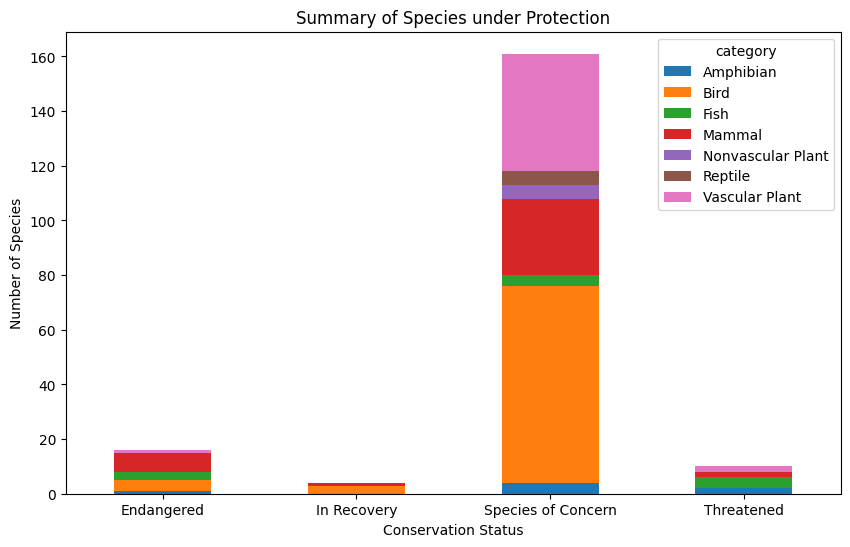

In [83]:
category_conservation_table.plot(kind='bar', stacked=True, figsize=(10,6))
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.title('Summary of Species under Protection')
plt.xticks(rotation=0)
plt.show()

In [87]:
df_species['is_protected'] = df_species.conservation_status != 'No Intervention'
#df_species['is_protected'].head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7     True
8     True
9     True
Name: is_protected, dtype: bool

In [114]:
category_protected_table = df_species.groupby(['category', 'is_protected'])\
    ['scientific_name'].nunique()\
    .reset_index()\
    .pivot(
        index='category',
        columns='is_protected',
        values='scientific_name'
    ).reset_index()

category_protected_table.columns = ['category' , 'not_protected', 'protected']
category_protected_table

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [118]:
category_protected_table['percentage_protected'] = category_protected_table.protected / \
    (category_protected_table.protected+category_protected_table.not_protected) * 100

category_protected_table.sort_values(by='percentage_protected', ascending=False)

,category,not_protected,protected,percentage_protected
3,Mammal,146,30,17.045455
1,Bird,413,75,15.368852
0,Amphibian,72,7,8.860759
2,Fish,115,11,8.730159
5,Reptile,73,5,6.410256
4,Nonvascular Plant,328,5,1.501502
6,Vascular Plant,4216,46,1.079305
